ARIMA model

In [12]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [13]:
data = pd.read_csv('merged_TimeWVHT_data.csv')
data.describe

<bound method NDFrame.describe of            #YY    MM    DD  ATMP       WTMP     WVHT
0       2020.0   1.0   1.0  26.7  28.100000  1.30000
1       2020.0   1.0   1.0  26.6  28.070833  1.28191
2       2020.0   1.0   1.0  26.9  28.070833  1.28191
3       2020.0   1.0   1.0  27.0  28.070833  1.28191
4       2020.0   1.0   1.0  27.0  28.070833  1.28191
...        ...   ...   ...   ...        ...      ...
206914  2023.0  12.0  31.0  26.5  28.070833  1.28191
206915  2023.0  12.0  31.0  26.5  28.070833  1.28191
206916  2023.0  12.0  31.0  26.6  28.070833  1.28191
206917  2023.0  12.0  31.0  26.5  28.070833  1.28191
206918  2023.0  12.0  31.0  26.4  28.070833  1.28191

[206919 rows x 6 columns]>

In [14]:
# Remove outliers in WVHT
q1 = data['WVHT'].quantile(0.25)
q3 = data['WVHT'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data_filtered = data[(data['WVHT'] >= lower_bound) & (data['WVHT'] <= upper_bound)]

Set time index

In [15]:
# Assuming '#YY', 'MM', and 'DD' are columns for year, month, and day
data['datetime'] = pd.to_datetime(dict(year=data['#YY'], month=data['MM'], day=data['DD']))

# Set the datetime as the index
data.set_index('datetime', inplace=True)

visualize WVHT

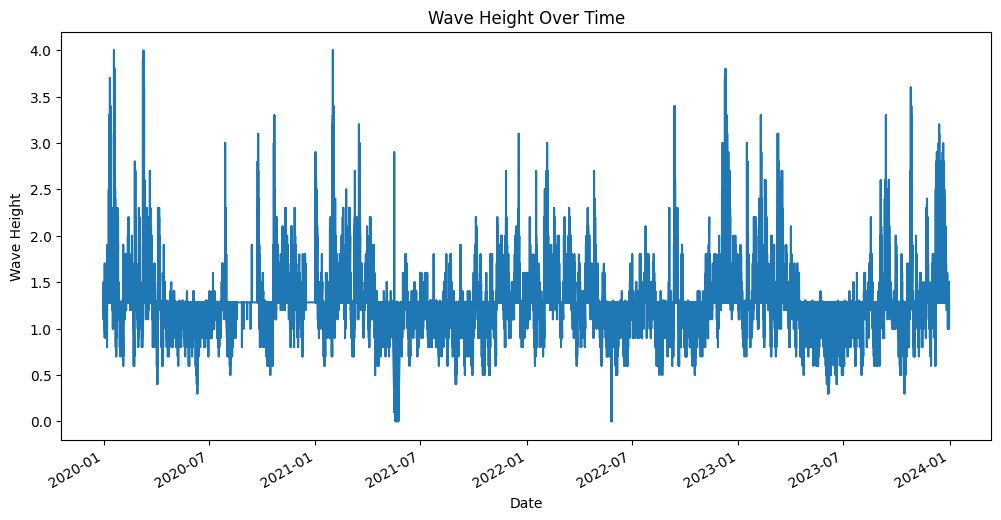

In [16]:
import matplotlib.pyplot as plt

# Plot wave height over time
data['WVHT'].plot(title='Wave Height Over Time', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Wave Height')
plt.show()

# Model V1
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA with a seasonal order (e.g., 12 for monthly seasonality)
model = SARIMAX(data['WVHT'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Summary and diagnostics
print(model_fit.summary())
model_fit.plot_diagnostics(figsize=(10, 6))
plt.show()

Include Environmental Variables: ATMP WTMP

In [17]:
model = SARIMAX(data['WVHT'], 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 1, 12), 
                exog=data[['ATMP', 'WTMP']])
model_fit = model.fit()
print(model_fit.summary())

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has bee

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.19575D+00    |proj g|=  2.09037D+00


 This problem is unconstrained.



At iterate    5    f= -1.20586D+00    |proj g|=  6.50572D-01

At iterate   10    f= -1.22690D+00    |proj g|=  8.43761D-01

At iterate   15    f= -1.23309D+00    |proj g|=  2.12927D-01

At iterate   20    f= -1.25958D+00    |proj g|=  1.55384D+00

At iterate   25    f= -1.27493D+00    |proj g|=  7.76664D-02

At iterate   30    f= -1.27577D+00    |proj g|=  9.01402D-03

At iterate   35    f= -1.27580D+00    |proj g|=  2.00932D-02

At iterate   40    f= -1.27612D+00    |proj g|=  4.39391D-02

At iterate   45    f= -1.27754D+00    |proj g|=  6.02822D-02


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.27775D+00    |proj g|=  2.53631D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     55      1     0     0   2.536D-02  -1.278D+00
  F =  -1.2777481630318606     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                     SARIMAX Results                                      
Dep. Variable:                               WVHT   No. Observations:               206919
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              264390.372
Date:                            Fri, 06 Dec 2024   AIC                        -528766.7

#worked for v1 model
# Forecast the next 30 time steps
forecast = model_fit.forecast(steps=30)

# Plot the forecast
forecast.plot(title='Wave Height Forecast')
plt.xlabel('Time Steps')
plt.ylabel('Wave Height')
plt.show()

# Print forecasted values
print(forecast)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


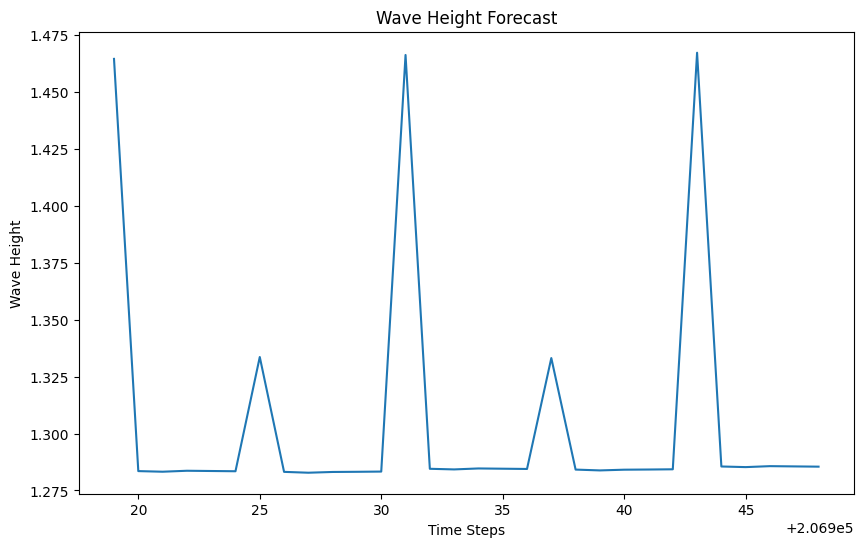

In [20]:
import numpy as np

# Forecast the next 30 time steps
steps = 30

# Generate future exogenous variables (example: assume constant or mean values)
future_exog = np.tile(data[['ATMP', 'WTMP']].iloc[-1].values, (steps, 1))

# Forecast with exogenous variables
forecast = model_fit.forecast(steps=steps, exog=future_exog)

# Plot the forecast
forecast_series = pd.Series(forecast, name="Forecasted Wave Height")
forecast_series.plot(title='Wave Height Forecast', figsize=(10, 6))
plt.xlabel('Time Steps')
plt.ylabel('Wave Height')
plt.show()

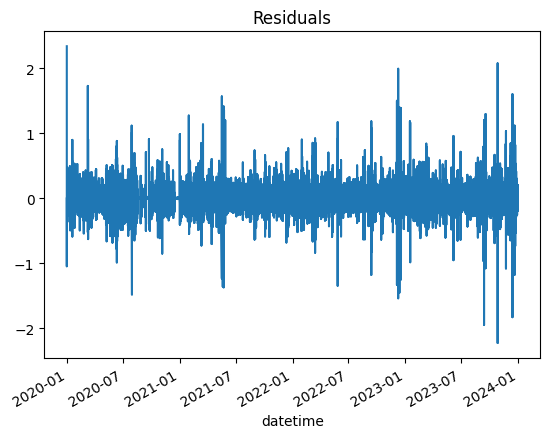

count    206919.000000
mean          0.000011
std           0.067657
min          -2.228219
25%          -0.002188
50%           0.000160
75%           0.002437
max           2.340261
dtype: float64


In [21]:
# Plot residuals
residuals = model_fit.resid
residuals.plot(title='Residuals')
plt.show()

# Check residual statistics
print(residuals.describe())

Grid search for best p, d, q

In [ ]:
import itertools
import pandas as pd

# Define p, d, q values to try
p = d = q = range(0, 3)

# Generate all combinations of p, d, q
pdq = list(itertools.product(p, d, q))

# Iterate over all combinations
best_aic = float("inf")
best_order = None
for order in pdq:
    try:
        model = ARIMA(data['WVHT'], order=order)
        model_fit = model.fit()
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_order = order
    except:
        continue

print(f"Best ARIMA order: {best_order} with AIC: {best_aic}")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has bee